In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=14)  # Adjust the size parameter as needed

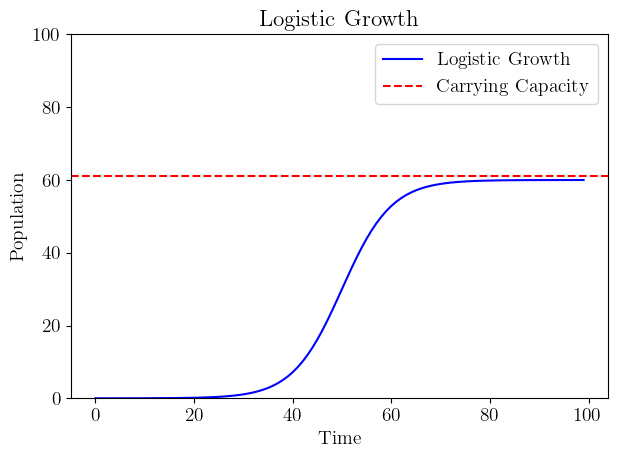

In [13]:

def logistic_growth(K, x0, r, t):
  return K / (1 + np.exp(-r * (t - x0)))

K = 60# Carrying capacity
KK = K
x0 = 50  # Initial population
r = 0.2  # Growth rate
t = np.arange(0, 100)  # Time steps

y = logistic_growth(K, x0, r, t)

plt.plot(t, y, label='Logistic Growth', color="b")
plt.axhline(y=K+1, color='red', linestyle='--', label='Carrying Capacity')
plt.ylim(0,100)
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Logistic Growth')
plt.legend()
plt.tight_layout()
plt.savefig("logistic_growth.png", bbox_inches="tight")
plt.show()


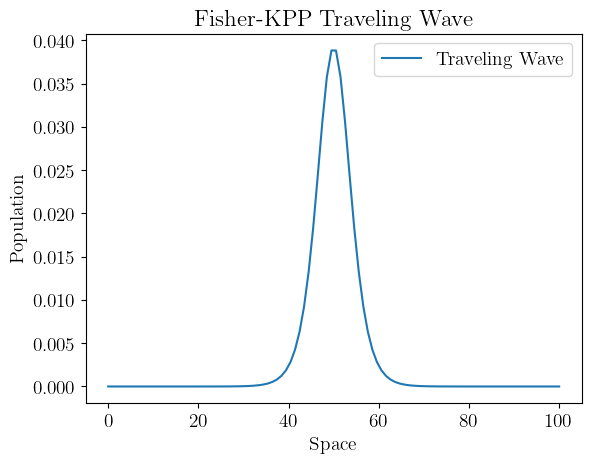

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
D = 0.1  # Diffusion coefficient
r = 0.1  # Growth rate
L = 100  # Length of the spatial domain
T = 200  # Total simulation time
dx = 1.0  # Spatial step
dt = 0.1  # Time step

# Discretization
Nx = int(L / dx)
Nt = int(T / dt)

# Initial condition
u = np.zeros(Nx)
u[int(0.2 * Nx):int(0.8 * Nx)] = 1.0

# Simulation loop
for n in range(Nt):
    # Compute spatial derivatives using central differences
    d2u = np.diff(u, 2)
    d2u = np.concatenate(([0], d2u, [0])) / dx**2
    
    # Fisher-KPP equation
    u += dt * (D * d2u - r * u * (1 - u))

# Plot the results
x = np.linspace(0, L, Nx)
plt.plot(x, u, label='Traveling Wave')
plt.xlabel('Space')
plt.ylabel('Population')
plt.title('Fisher-KPP Traveling Wave')
plt.legend()
plt.show()


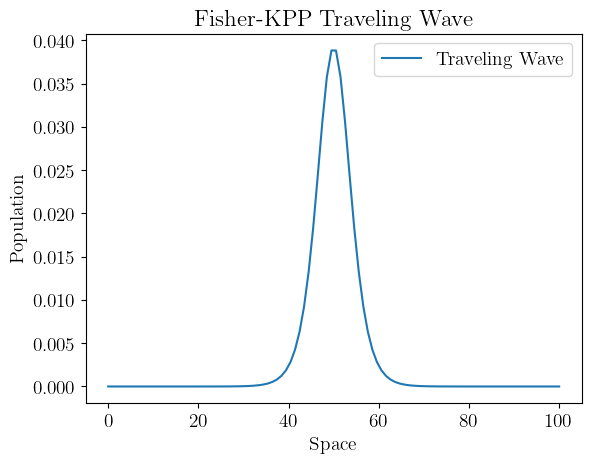

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
D = 0.1  # Diffusion coefficient
r = 0.1  # Growth rate
L = 100  # Length of the spatial domain
T = 200  # Total simulation time
dx = 1.0  # Spatial step
dt = 0.1  # Time step

# Discretization
Nx = int(L / dx)
Nt = int(T / dt)

# Initial condition
u = np.zeros(Nx)
u[int(0.2 * Nx):int(0.8 * Nx)] = 1.0

# Simulation loop
for n in range(Nt):
    # Compute spatial derivatives using central differences
    d2u = np.diff(u, 2)
    d2u = np.concatenate(([0], d2u, [0])) / dx**2
    
    # Fisher-KPP equation
    u += dt * (D * d2u - r * u * (1 - u))

# Plot the results
x = np.linspace(0, L, Nx)
plt.plot(x, u, label='Traveling Wave')
plt.xlabel('Space')
plt.ylabel('Population')
plt.title('Fisher-KPP Traveling Wave')
plt.legend()
plt.show()


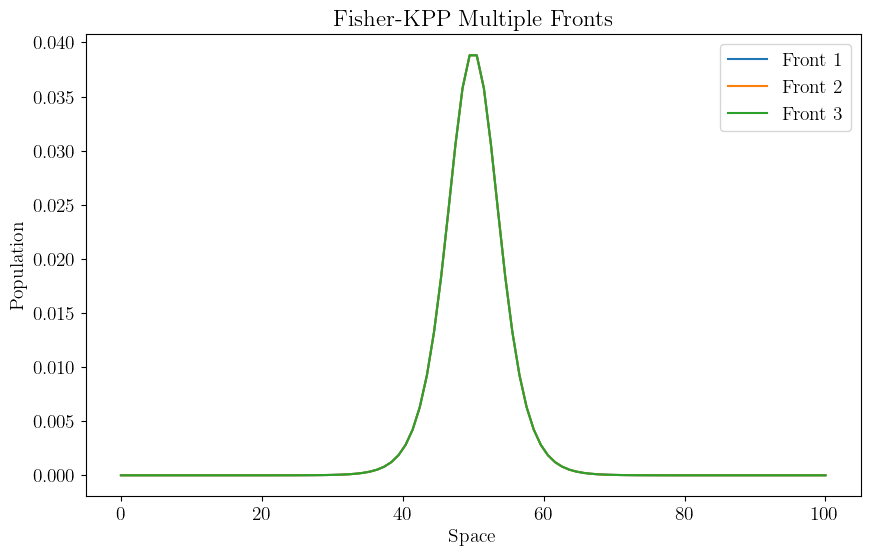

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
D = 0.1  # Diffusion coefficient
r = 0.1  # Growth rate
L = 100  # Length of the spatial domain
T = 200  # Total simulation time
dx = 1.0  # Spatial step
dt = 0.1  # Time step

# Discretization
Nx = int(L / dx)
Nt = int(T / dt)

# Initial conditions (multiple pulses)
num_pulses = 3
initial_conditions = np.zeros((num_pulses, Nx))
initial_conditions[:, int(0.2 * Nx):int(0.8 * Nx)] = 1.0

# Plot setup
plt.figure(figsize=(10, 6))
plt.xlabel('Space')
plt.ylabel('Population')
plt.title('Fisher-KPP Multiple Fronts')

# Simulation loop for each initial condition
for i in range(num_pulses):
    u = initial_conditions[i].copy()

    for n in range(Nt):
        # Compute spatial derivatives using central differences
        d2u = np.diff(u, 2)
        d2u = np.concatenate(([0], d2u, [0])) / dx**2
        
        # Fisher-KPP equation
        u += dt * (D * d2u - r * u * (1 - u))

    # Plot the results
    x = np.linspace(0, L, Nx)
    plt.plot(x, u, label=f'Front {i + 1}')

# Show the legend
plt.legend()
plt.show()


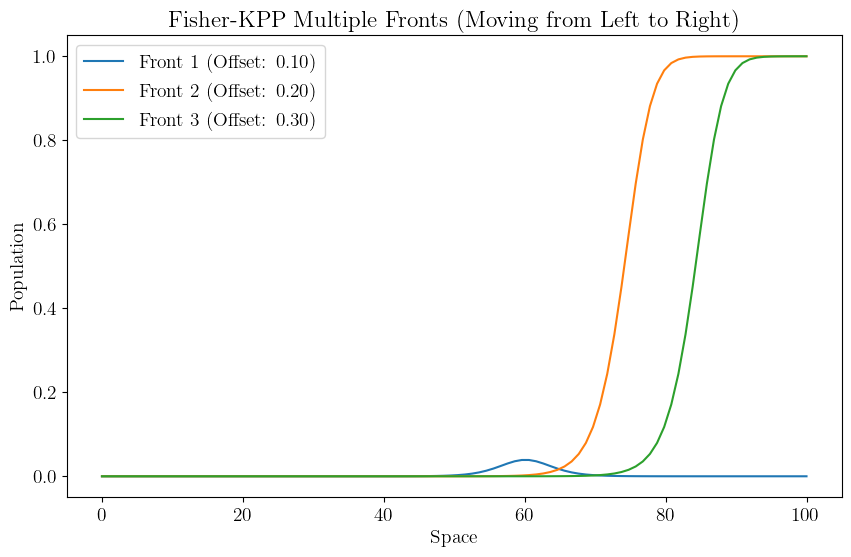

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
D = 0.1  # Diffusion coefficient
r = 0.1  # Growth rate
L = 100  # Length of the spatial domain
T = 200  # Total simulation time
dx = 1.0  # Spatial step
dt = 0.1  # Time step

# Discretization
Nx = int(L / dx)
Nt = int(T / dt)

# Initial conditions (multiple pulses with an offset)
num_pulses = 3
initial_conditions = np.zeros((num_pulses, Nx))
offsets = np.linspace(0.1, 0.3, num_pulses)  # Adjust the offset values

# Populate initial conditions with pulses
for i in range(num_pulses):
    initial_conditions[i, int((0.2 + offsets[i]) * Nx):int((0.8 + offsets[i]) * Nx)] = 1.0

# Plot setup
plt.figure(figsize=(10, 6))
plt.xlabel('Space')
plt.ylabel('Population')
plt.title('Fisher-KPP Multiple Fronts (Moving from Left to Right)')

# Simulation loop for each initial condition
for i in range(num_pulses):
    u = initial_conditions[i].copy()

    for n in range(Nt):
        # Compute spatial derivatives using central differences (reversed for left to right)
        d2u = np.diff(u[::-1], 2)[::-1]
        d2u = np.concatenate(([0], d2u, [0])) / dx**2
        
        # Fisher-KPP equation
        u += dt * (D * d2u - r * u * (1 - u))

    # Plot the results with a label indicating the offset
    x = np.linspace(0, L, Nx)
    plt.plot(x, u, label=f'Front {i + 1} (Offset: {offsets[i]:.2f})')

# Show the legend
plt.legend()
plt.show()


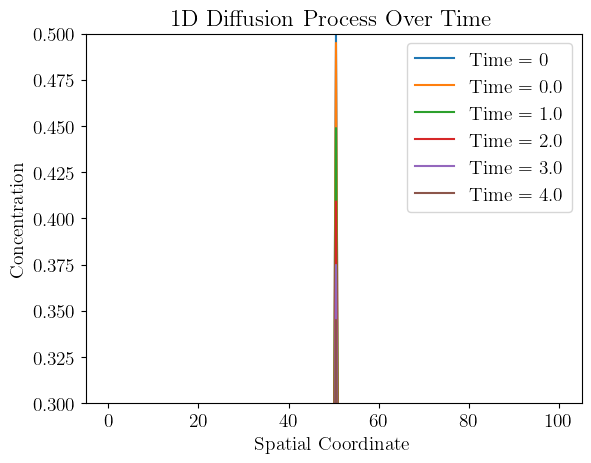

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
D = 0.05  # Diffusion coefficient
L = 100  # Length of the spatial domain
T = 5   # Total time
dt = 0.1  # Time step
Nx = 100  # Number of spatial points
Nt = int(T / dt)  # Number of time steps

# Initialize the spatial grid
x = np.linspace(0, L, Nx)

# Initialize the initial condition
u = np.zeros(Nx)
u[int(Nx / 2)] = 0.5  # Initial concentration at the center

# Plot the initial condition
plt.plot(x, u, label=f'Time = 0')

# Perform the diffusion process and plot at different time steps
for n in range(Nt):
    u[1:-1] += D * dt / (L / Nx)**2 * (u[:-2] - 2 * u[1:-1] + u[2:])
    if n % 10 == 0:  # Plot every 10 time steps for visibility
        plt.plot(x, u, label=f'Time = {n * dt:.1f}')

# Plot the final result
plt.title('1D Diffusion Process Over Time')
plt.xlabel('Spatial Coordinate')
plt.ylabel('Concentration')
plt.ylim(0.3,0.5)
plt.legend()
plt.show()